<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_cycle_detect_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python hurok detektállás 

## A networkx és pyvis csomag használata

<https://klajosw.blogspot.com/>


https://networkx.github.io/documentation/stable/auto_examples/index.html

---




In [ ]:
### pyvis
## ha szükséges installáljuk a csomagokat
## !pip install pyvis --upgrade
!pip install jsonpickle --upgrade


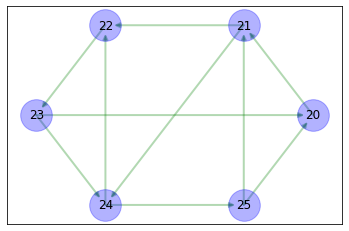

In [ ]:
def draw_graph(graph):
    # irányitott hálózat gráf megjelenítése networkx csomaggal
    G=nx.DiGraph()

    # élek hozzáadása
    G.add_edges_from(graph)

    graph_pos = nx.shell_layout(G)

    # nodok hozzáadása, élek és cimkék összekapcsolása
    nx.draw_networkx_nodes(G, graph_pos, node_size=1000, node_color='blue', alpha=0.3)
    # stilus, színezés
    nx.draw_networkx_edges(G, graph_pos, width=2, alpha=0.3, edge_color='green')
    nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

    # megjelenítés
    plt.show()

# we can add more edges here as the direction is a factor now,
# edges are added as (from_node, to_node) tuples
# hence (22, 25) and (25, 22) are different. In undirected graph,
# we couldn't have told the difference.
graph = graph = [
        (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 20),
        (25, 21), (23, 20), (24, 22), (21, 24), (20, 21)
    ]
draw_graph(graph)

drawing in circular layout


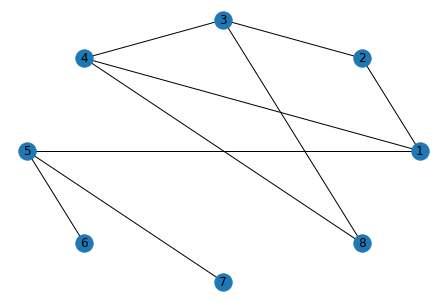

drawing in planar layout


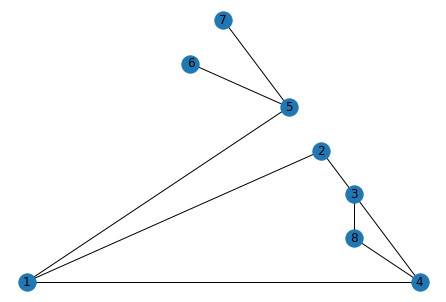

drawing in random layout


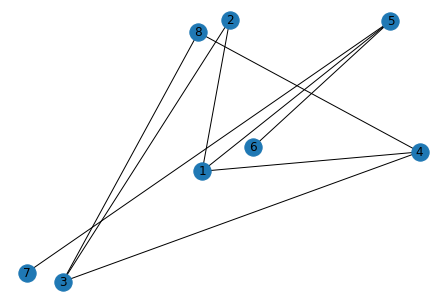

drawing in specrtal layout


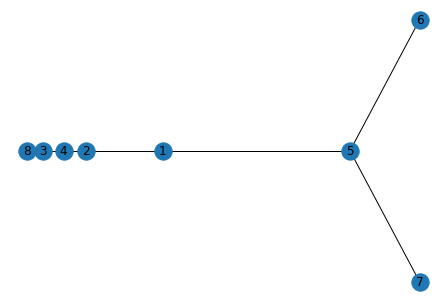

drawing in spring layout


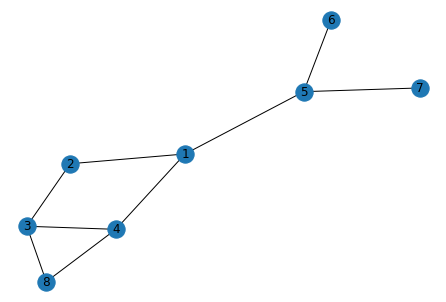

drawing in shell layout


<Figure size 432x288 with 0 Axes>

In [ ]:
## különböző megjelenítési módok 
import networkx as nx 
import matplotlib.pyplot as plt 
  
g = nx.Graph() 
  
g.add_edge(1, 2) 
g.add_edge(2, 3) 
g.add_edge(3, 4) 
g.add_edge(1, 4) 
g.add_edge(1, 5) 
g.add_edge(5, 6) 
g.add_edge(5, 7) 
g.add_edge(4, 8) 
g.add_edge(3, 8) 
  
print('drawing in circular layout') 
nx.draw_circular(g, with_labels = True) 
plt.savefig("filename1.png") ## mentés
plt.show()
  
# törlése az aktuális vászonnak 
plt.clf() 
  
print('drawing in planar layout') 
nx.draw_planar(g, with_labels = True) 
plt.savefig("filename2.png")  ## mentés
plt.show()
  
# törlése az aktuális vászonnak 
plt.clf() 
  
print('drawing in random layout') 
nx.draw_random(g, with_labels = True) 
plt.savefig("filename3.png")  ## mentés
plt.show()

# törlése az aktuális vászonnak 
plt.clf() 
  
print('drawing in specrtal layout') 
nx.draw_spectral(g, with_labels = True) 
plt.savefig("filename4.png") ## mentés
plt.show()
  
# törlése az aktuális vászonnak 
plt.clf() 
  
print('drawing in spring layout') 
nx.draw_spring(g, with_labels = True) 
plt.savefig("filename5.png") ## mentés
plt.show()
  
# törlése az aktuális vászonnak 
plt.clf() 
  
print('drawing in shell layout') 
nx.draw_shell(g, with_labels = True) 
plt.savefig("filename6.png") 
  
# törlése az aktuális vászonnak 
plt.clf() 

In [ ]:
from pyvis.network import Network
import pandas as pd

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("https://www.macalester.edu/~abeverid/data/stormofswords.csv")

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show("gameofthrones.html")

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
g = nx.Graph()
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2)
print (nx.shortest_path(g, 'b', 'd'))

print (nx.shortest_path(g, 'b', 'd', weight='weight') )
plt.show()

['b', 'c', 'd']
['b', 'a', 'c', 'd']


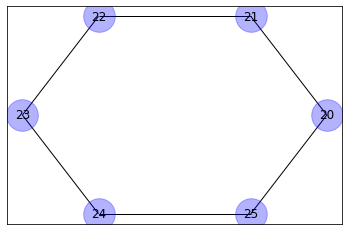

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    # create networkx graph
    G=nx.Graph()

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    # There are graph layouts like shell, spring, spectral and random.
    # Shell layout usually looks better, so we're choosing it.
    # I will show some examples later of other layouts
    graph_pos = nx.shell_layout(G)

    # draw nodes, edges and labels
    nx.draw_networkx_nodes(G, graph_pos, node_size=1000, node_color='blue', alpha=0.3)
    nx.draw_networkx_edges(G, graph_pos)
    nx.draw_networkx_labels(G, graph_pos, font_size=12, font_family='sans-serif')

    # show graph
    plt.show()

# draw example
# graph is a list of tuples of nodes. Each tuple defining the
# connection between 2 nodes
graph = [(20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 20)]

draw_graph(graph)

['A', 'B', 'C', 'D', 'E', 'F', 'G']
[('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('F', 'G')]


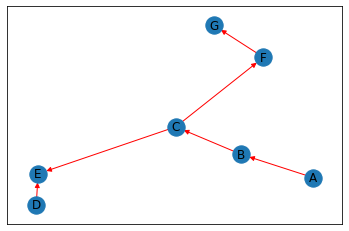

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")
G.add_node("F")
G.add_node("G")
G.add_edge("A","B")
G.add_edge("B","C")
G.add_edge("C","E")
G.add_edge("C","F")
G.add_edge("D","E")
G.add_edge("F","G")
print(G.nodes())
print(G.edges())
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows = True)
plt.show()

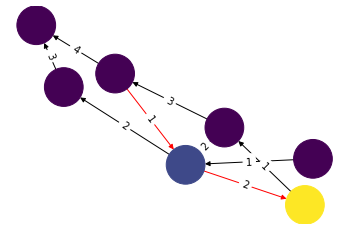

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

### nx.draw_networkx(G, arrows=True, **options) ## You can add options by initialising that ** variable like this:
KL = '''
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
'''

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()

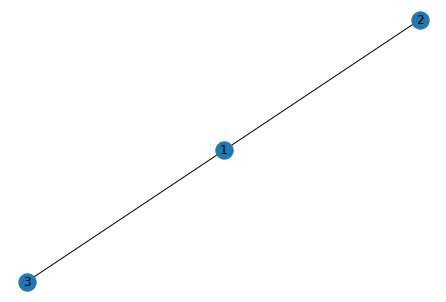

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
nx.draw(G, with_labels=True)
plt.show()

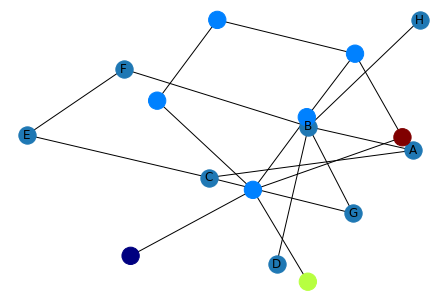

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, with_labels=True)

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

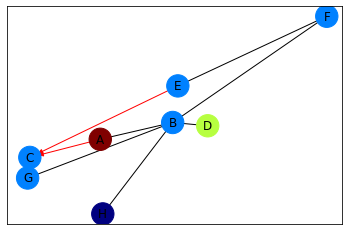

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

---

## Csomagok tartalma

---

In [ ]:
####   import BProp   ## Használata
import networkx as nx
from tqdm import tqdm
import time

class BPGraph(nx.DiGraph):           
    def __init__(self):
        super().__init__()
        self.next_index = 0
        self.binary_predecessors = []
        self.binary_successors = []
        self.neighbors = []
    
    def neighbors(self, index):
        return list(self[index])
    
    def __propagate(self, index_to, visited = 0):        
        visited = visited | 1 << index_to
        if(self.binary_successors[index_to] > 0):
            for successor in self.__get_indexes(self.binary_successors[index_to]): 
                self.binary_predecessors[successor] = self.binary_predecessors[successor] | self.binary_predecessors[index_to]
                
            for successor in self.__get_indexes(self.binary_successors[index_to]): 
                if 1 << successor & visited != 0:
                    self.__propagate(successor, visited)
            
    def __get_indexes(self, bin_sum):
        num = bin_sum
        powers = []
        counter = 0
        while num > 0:
            if(num % 2):
                powers.append(counter)
            num = num >> 1
            counter = counter + 1
        return powers
    
    def __get_number(self, index):
        number = 1
        for i in range(0, index):
            number = number << 2
        return number
    
    def add_node(self):
        super().add_node(self.next_index)
        self.next_index = self.next_index + 1
        self.binary_predecessors.append(0)
        self.binary_successors.append(0)
        self.neighbors.append(0)
        return self.next_index
    
    def add_n_nodes(self, n):
        nodes = []
        for i in range(0, n):
            nodes.append(self.add_node())
        return nodes
    
    def add_incremental_edges(self, edges):
        cycles = []
        pbar = tqdm(total = len(edges))
        for edge in edges:
            if(not self.add_edge(edge[0], edge[1])):
                cycles.append(edge)
            pbar.update(1)
        pbar.close()
        return cycles
        
    def add_edge(self, node_from, node_to, decrement = False):        
        if(node_from == node_to):     # if it's a reflexive edge, then it's a cycle
            return False
        
        if decrement:
            index_from = node_from -1   # if the nodes start from 1 instead of 0, we must decrement them
            index_to = node_to - 1
        else:
            index_from = node_from
            index_to = node_to

        
        if(self.binary_predecessors[index_from] & (1 << index_to) or # if the target edge is an predecessorof the origin
          self.binary_predecessors[index_from] & self.binary_successors[index_to]):  # if the target edge has a successor that is an predecessorof the starting edge
            return False
        else:        
            self.binary_predecessors[index_to] = self.binary_predecessors[index_to] | self.binary_predecessors[index_from] | (1 << index_from)
            self.neighbors[index_from] = self.neighbors[index_from] | (1 << index_to)
            self.__propagate(index_to)
            super().add_edge(index_from, index_to)            
            return True
        
######################### DFS #############################################

    def classic_dfs(self, start, target, visited):
        cycle = False
        for next_edge in list(self[start]):
            if next_edge == target:
                return True
            elif next_edge not in visited:
                visited.append(next_edge)
                cycle = self.classic_dfs(next_edge, target, visited)
                if cycle:
                    return True
                else:
                    visited.pop()  
                    if visited == []:
                        return False
        return False
    
    def incremental_dfs(self, edges):
        cycles = []
        pbar = tqdm(total = len(edges))
        
        for edge in edges:
            if not self.add_dfs_edge(edge[0], edge[1]):
                cycles.append(edge)
            pbar.update(1)
        pbar.close()
        return cycles
            
    def add_dfs_edge(self, node_from, node_to):
        if node_from == node_to:
            return False
        elif self.classic_dfs(node_to, node_from, [node_to]):
            return False
        else:
            super().add_edge(node_from, node_to)
            return True    
        
######################### BFS #############################################

    def classic_bfs(self, start, target, visited):
        cycle = False
        for next_edge in list(self[start]):
            if next_edge == target:
                return True
            
        for next_edge in list(self[start]):
            if next_edge not in visited:
                visited.append(next_edge)
                cycle = self.classic_bfs(next_edge, target, visited)
                if cycle:
                    return True
                else:
                    visited.pop()
                    if visited == []:
                        return False
            
        return False
    
    def incremental_bfs(self, edges):
        cycles = []
        pbar = tqdm(total = len(edges))
        
        for edge in edges:
            if not self.add_bfs_edge(edge[0], edge[1]):
                cycles.append(edge)
            pbar.update(1)
        pbar.close()
        return cycles
            
    def add_bfs_edge(self, node_from, node_to):
        if node_from == node_to:
            return False
        elif self.classic_bfs(node_to, node_from, [node_to]):
            return False
        else:
            super().add_edge(node_from, node_to)
            return True    

In [ ]:
######## import Bernstein
import random
import math
import sys
from tqdm import tqdm as tqdm_no_notebook
from tqdm import tqdm_notebook
import networkx as nx
import time
import matplotlib.pyplot as plt

class Bernstein(nx.DiGraph):           
    def __init__(self):
        super().__init__()
        self.A = []
        self.D = []
        self.As = []
        self.Ds = []
        self.AA = []
        self.logs = []
        self.S = set()
        
    def backable_add(self, obj, element):
        if element not in obj:
            obj.add(element)
            self.logs.append((obj, element))

            
    def update(self, a,b):
        a_ancestors = [x for x in nx.ancestors(self, a)] + [a]
        b_descendants = [x for x in nx.descendants(self, b)] + [b]
        
        for s in b_descendants:
            if s in self.S:
                for anc in a_ancestors:
                    self.backable_add(self.A[s], anc)
                    self.backable_add(self.Ds[anc], s)
        for s in a_ancestors:
            if s in self.S:
                for des in b_descendants:
                    self.backable_add(self.D[s], des)
                    self.backable_add(self.As[des], s)

            
    def is_s_equivalent(self, u,v):
        return len(self.As[u]) == len(self.As[v]) and len(self.Ds[u]) == len(self.Ds[v])
            
        
    def check(self, a,b):
        to_explore = set([b])
        while len(to_explore) > 0:
            w = to_explore.pop()
            if w == a:
                return False
            if w in self.AA[a]:
                return False
            elif a in self.AA[w]:
                pass
            elif not self.is_s_equivalent(a, w):
                pass
            else:
                self.backable_add(self.AA[w], a)
                for w,z in self.out_edges(w):
                    to_explore.add(z)
        return True
    
    def add_n_nodes(self, N):
        self.add_nodes_from(list(range(N)))
        sample_prob_threshold = 11 * math.log(N) / math.sqrt(N)
        self.S = set([i for i in range(N) if random.random() <= sample_prob_threshold])

        self.A = [set([i]) for i in range(N)]
        self.D = [set([i]) for i in range(N)]
        self.As = [set([i]).intersection(self.S) for i in range(N)]
        self.Ds = [set([i]).intersection(self.S) for i in range(N)]

        self.AA = [set([i]) for i in range(N)]
        
    def add_edge(self, s, t):
        super().add_edge(s,t)
        self.update(s,t)
        if not self.check(s,t):
            #yield G, (s,t), id_node
            # rollback
            while len(self.logs) > 0:
                obj, element = self.logs.pop()
                obj.remove(element)
            self.remove_edge(s,t)
            return False
        else:
            return True



In [ ]:
#######  import TSVParse as tsv
import csv

def decode_konect_tsv(file_name):
    tsv_list = []
    with open(file_name) as tsvfile:
        tsvreader = csv.reader(tsvfile, delimiter="\t")
        skip = True
        meta = False
        line_counter = 1
        for line in tsvreader:
            if not skip:
                if not meta:
                    tup = decode_tsv_line(line[0])
                    if not tup:
                        print("Parse error on line " + str(line_counter) + ". The program will continue.")
                    else:
                        tsv_list.append(tup)
                else:
                    aux = line[0].replace('% ', '')
                    tup = decode_tsv_line(aux)
                    if not tup:
                        print("Parse error on line " + str(line_counter) + ". The program will continue.")
                    else:
                        tsv_list.append(tup)
                    meta = False
            else:
                skip = False
                meta = True
        line_counter = line_counter + 1
    return tsv_list
                
def decode_tsv_line(string):    
    nodes = ''
    edges = ''
    node = False
    edge = True
    for char in string:
        if node and char == ' ':
            break
        if node:
            nodes = nodes + char
        if edge and char == ' ':
            edge = False
            node = True
        if edge:
            edges = edges + char
    try:
        return ((int(nodes, 10), int(edges, 10)))
    except:
        return False



In [ ]:
import time
import networkx as nx
import BProp
import Bernstein
import TSVParse as tsv
from tqdm import tqdm
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
matplotlib.use("nbagg")

In [ ]:
ut=set('')
utirany=set('')
ut2=[]
edges = [(5, 4), (2, 4), (5, 2), (2, 3), (2, 5), (2, 1), (2, 3), (3, 5), (1, 3), (5, 2), (2,4)]
for x, y in edges :
    utirany.add((x, y))
    
    if x > y :
        ut.add((y,x))
        ut2.append((y,x))
    else :
        ut.add((x,y))
        ut2.append((x, y))
print(ut)
print('------------')
print(ut2)
print('------------')
print(utirany)

{(1, 2), (1, 3), (4, 5), (2, 3), (2, 5), (2, 4), (3, 5)}
------------
[(4, 5), (2, 4), (2, 5), (2, 3), (2, 5), (1, 2), (2, 3), (3, 5), (1, 3), (2, 5), (2, 4)]
------------
{(5, 4), (1, 3), (2, 1), (2, 3), (2, 5), (5, 2), (2, 4), (3, 5)}


100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 5523.45it/s]

[(5, 4), (2, 4), (5, 2), (2, 3), (2, 5), (2, 1), (2, 3), (3, 5), (1, 3), (5, 2), (2, 4)]
no 5 4
no 2 4
no 5 2
no 2 3
Cyle 2 5
no 2 1
no 2 3
Cyle 3 5
no 1 3
no 5 2
no 2 4
Time: 0.0009903907775878906 s 
Cycles: 2 



<IPython.core.display.Javascript object>


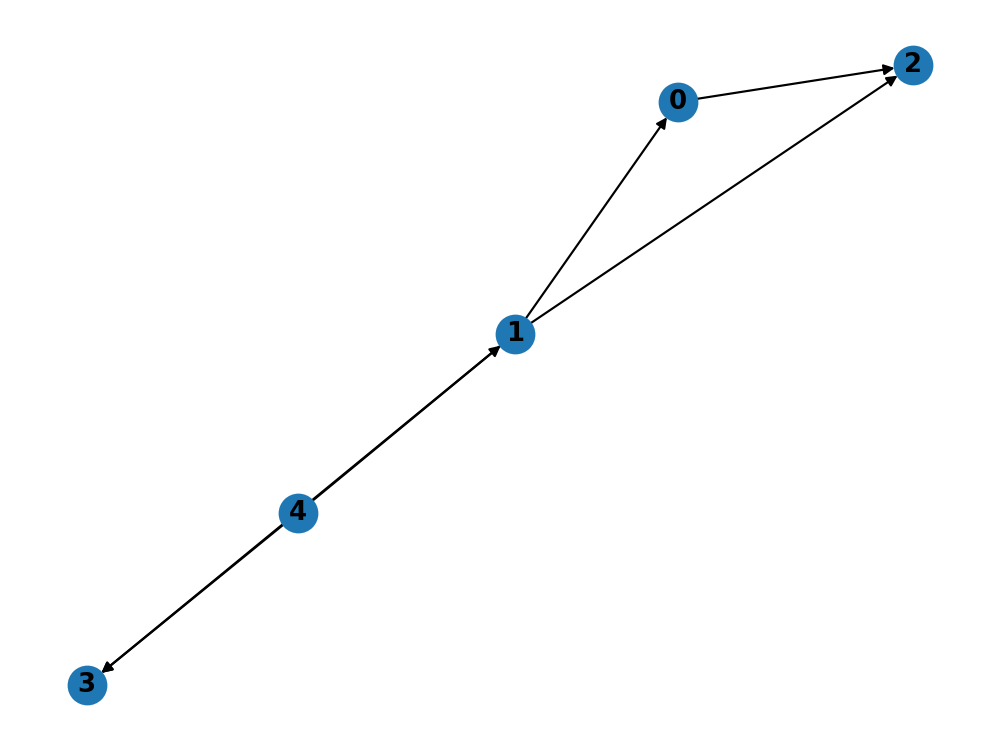

In [ ]:
M = 100
N = 5
edges = [(5, 4), (2, 4), (5, 2), (2, 3), (2, 5), (2, 1), (2, 3), (3, 5), (1, 3), (5, 2),(2,4)]
print(edges)    
G = BProp.BPGraph()
num = G.add_n_nodes(N)
cycles_G = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if not G.add_edge(u, v, decrement = True): # use decrement = False if using nodes starting from 0 instead of 1
        cycles_G = cycles_G + 1
        print('Cyle', u, v)
    else:
        print('no', u, v)
    pbar.update(1)
    
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles_G, "\n")
#nx.draw(G)
nx.draw(G, with_labels=True, font_weight='bold')

## Generating a random graph
### N is the number of nodes and M is the number of edges

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 5039.41it/s]

[(1, 2), (3, 4), (1, 5), (2, 2), (4, 1), (5, 4), (1, 1), (5, 3), (2, 2), (2, 3)]
no 1 2
no 3 4
no 1 5
Cyle 2 2
no 4 1
no 5 4
Cyle 1 1
no 5 3
Cyle 2 2
no 2 3
Time: 0.0009851455688476562 s 
Cycles: 3 



<IPython.core.display.Javascript object>


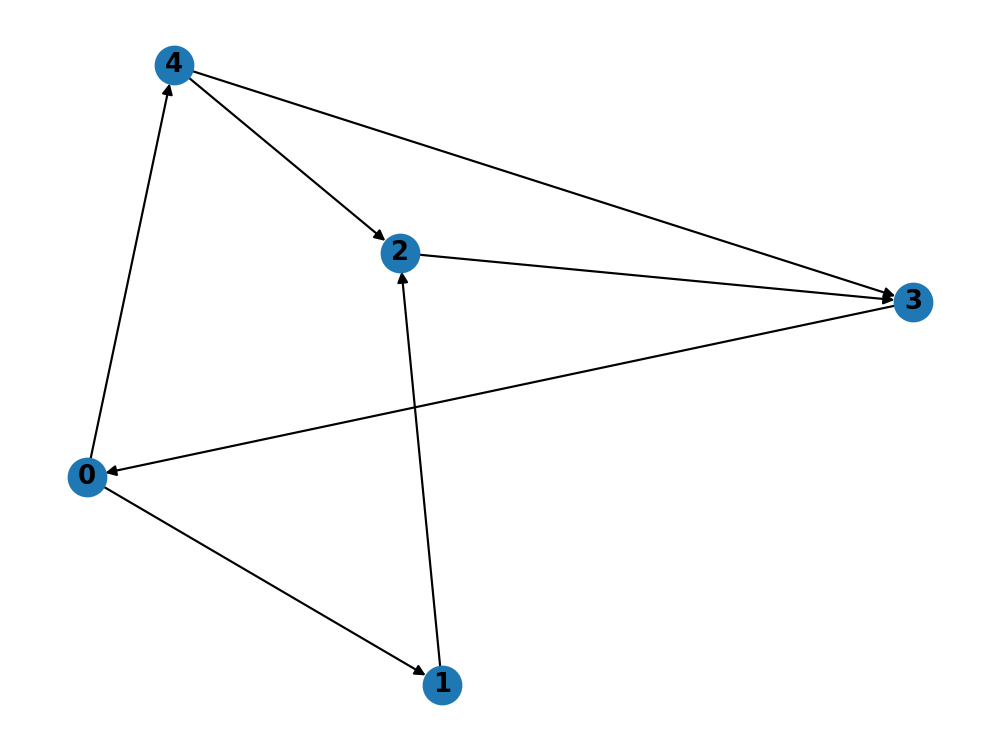

In [ ]:
M = 10
N = 5
edges = []
for i in range(M):
    s = random.randrange(N)
    t = random.randrange(N)
    edges.append((s + 1,t + 1))
  
print(edges)    
G = BProp.BPGraph()
num = G.add_n_nodes(N)
cycles_G = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if not G.add_edge(u, v, decrement = True): # use decrement = False if using nodes starting from 0 instead of 1
        cycles_G = cycles_G + 1
        print('Cyle', u, v)
    else:
        print('no', u, v)
    pbar.update(1)
    
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles_G, "\n")
#nx.draw(G)
nx.draw(G, with_labels=True, font_weight='bold')


## Importing a graph

(28, 250)



100%|█████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 50058.53it/s]

Time: 0.003001689910888672 s 
Cycles: 22 



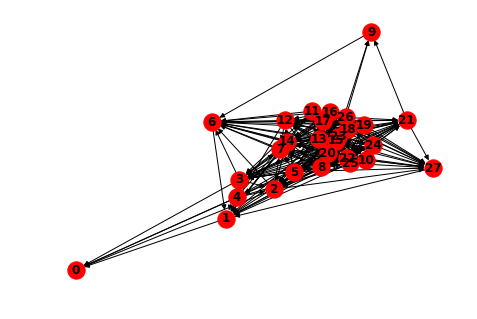

In [ ]:
edges = tsv.decode_konect_tsv("graphs/sheep.tsv")
#edges = tsv.decode_konect_tsv("graphs/cattle.tsv")
#edges = tsv.decode_konect_tsv("graphs/rhesus.tsv")
#edges = tsv.decode_konect_tsv("graphs/us airports.tsv")
#edges = tsv.decode_konect_tsv("graphs/little rock lake.tsv")
#edges = tsv.decode_konect_tsv("graphs/macaques.tsv")
#edges = tsv.decode_konect_tsv("graphs/dutch college.tsv")
#edges = tsv.decode_konect_tsv("graphs/hens.tsv")
#edges = tsv.decode_konect_tsv("graphs/sampson.tsv")
#edges = tsv.decode_konect_tsv("graphs/seventh graders.tsv")
#edges = tsv.decode_konect_tsv("graphs/florida dry.tsv")
#edges = tsv.decode_konect_tsv("graphs/florida wet.tsv")
#edges = tsv.decode_konect_tsv("graphs/bison.tsv")
#edges = tsv.decode_konect_tsv("graphs/blogs.tsv")
#edges = tsv.decode_konect_tsv("graphs/high school.tsv")
#edges = tsv.decode_konect_tsv("graphs/manufacturing emails.tsv")
#edges = tsv.decode_konect_tsv("graphs/physicians.tsv")
#edges = tsv.decode_konect_tsv("graphs/residence hall.tsv")
#edges = tsv.decode_konect_tsv("graphs/adolescent health.tsv")
#edges = tsv.decode_konect_tsv("graphs/open flights.tsv")
print(edges[0])
N = edges[0][0]
M = edges[0][1]
del(edges[0])
G = BProp.BPGraph()
num = G.add_n_nodes(N)
cycles_G = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if not G.add_edge(u, v, decrement = True): # use decrement = False if using nodes starting from 0 instead of 1
        cycles_G = cycles_G + 1
        #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles_G, "\n")
#nx.draw(G)
nx.draw(G, with_labels=True, font_weight='bold')

## BProp

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]

Time: 0.0 s 
Cycles: 3 



<IPython.core.display.Javascript object>


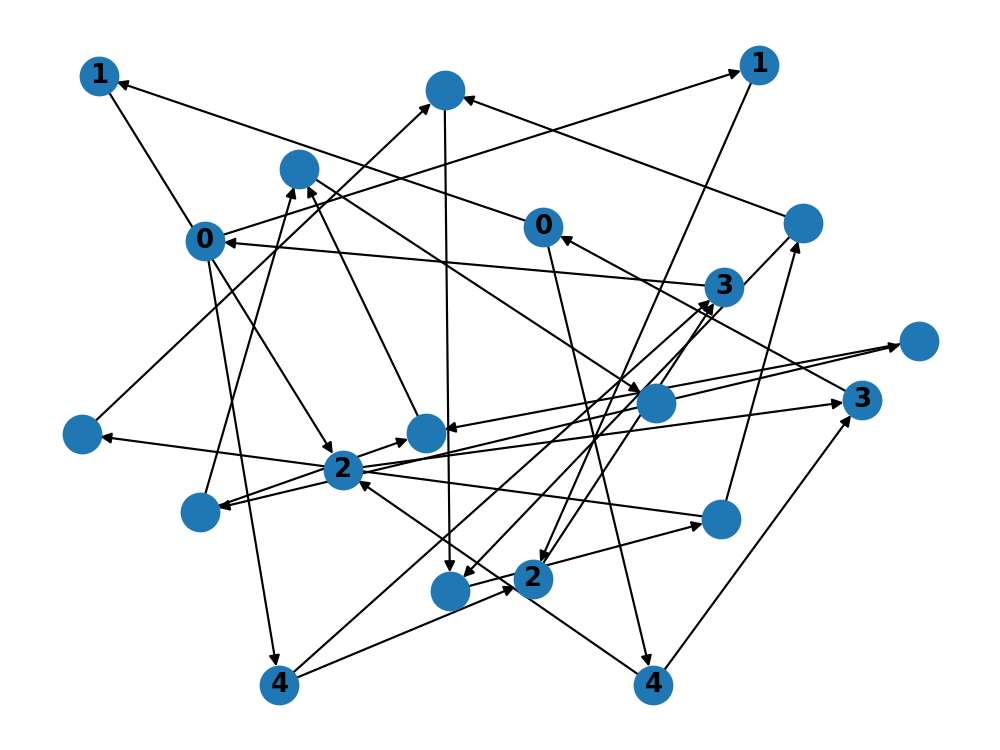

In [ ]:
G = BProp.BPGraph()
num = G.add_n_nodes(N)
cycles_G = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if not G.add_edge(u, v, decrement = True): # use decrement = False if using nodes starting from 0 instead of 1
        cycles_G = cycles_G + 1
        #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles_G, "\n")
nx.draw(G)

## Bernstein and Chechik's algorithm

In [ ]:
B = Bernstein.Bernstein()
B.add_n_nodes(N)
cycles = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if v - 1 not in B.neighbors(u - 1):
        if not B.add_edge(u - 1, v - 1):
            cycles = cycles + 1
            #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles, "\n")
nx.draw(G)

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10000.72it/s]

Time: 0.0009999275207519531 s 
Cycles: 6 



## DFS

In [ ]:
D = BProp.BPGraph()
num = D.add_n_nodes(N)
pbar = tqdm(total = len(edges))
cycles_dfs = 0
start = time.time()

for u, v in edges:
    if v - 1 not in list(D[u - 1]):
        if not D.add_dfs_edge(u - 1, v - 1):
            cycles_dfs = cycles_dfs + 1
            #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("\nTime:", float(end - start), "s \nCycles:", cycles_dfs, "\n")
#nx.draw(G)
nx.draw(G, with_labels=True, font_weight='bold')


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10003.11it/s]


Time: 0.0009996891021728516 s 
Cycles: 6 



## BFS

In [ ]:
M = 10
N = 5
edges = []
for i in range(M):
    s = random.randrange(N)
    t = random.randrange(N)
    edges.append((s + 1,t + 1))
b = BProp.BPGraph()
num = b.add_n_nodes(N)
pbar = tqdm(total = len(edges))
cycles_bfs = 0
start = time.time()

for u, v in edges:
    if v - 1 not in list(b[u - 1]):
        if not b.add_dfs_edge(u - 1, v - 1):
            cycles_bfs = cycles_bfs + 1
            #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("\nTime:", float(end - start), "s \nCycles:", cycles_bfs, "\n")
#nx.draw(G)
nx.draw(G, with_labels=True, font_weight='bold')

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


Time: 0.0 s 
Cycles: 5 



## Printing a graph while inserting edges

<IPython.core.display.Javascript object>


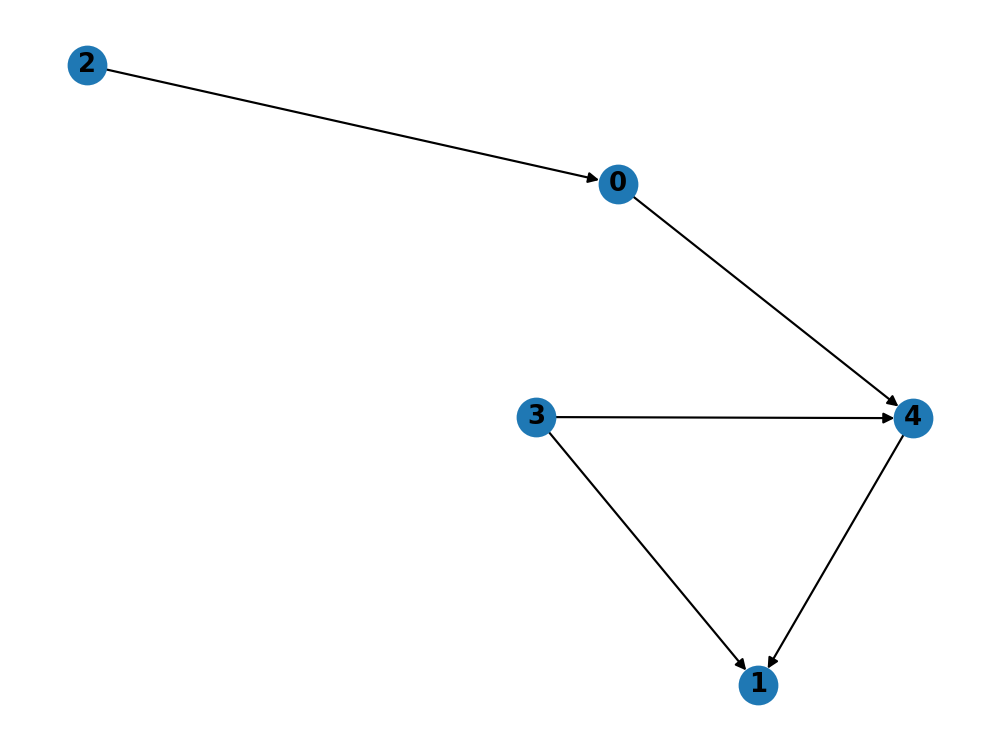

Time: 0.0060155391693115234 s


In [ ]:
G = BProp.BPGraph()
num = G.add_n_nodes(N)
start = time.time()

fig = plt.figure()
plt.ion()

def init():
    nx.draw(G, with_labels=True, font_weight='bold')

def update(edge):
    if G.add_edge(edge[0], edge[1], decrement = True):
        plt.cla()
        nx.draw(G, with_labels=True, font_weight='bold')

ani = FuncAnimation(fig, update, frames = edges, interval = 100., init_func = init, repeat = False)       
#nx.draw(G, with_labels=True, font_weight='bold')

end = time.time()
print("Time:", float(end - start), "s")